### tiny_LISA_traffic_sign_detection
Dataset: https://www.kaggle.com/datasets/mmontiel/tiny-lisa-traffic-sign-detection-dataset
Reference: https://curiousily.com/posts/object-detection-on-custom-dataset-with-yolo-v5-using-pytorch-and-python/

In [21]:

# to perform linear algebra
import numpy as np

# data processing
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import cv2

### EDA

In [9]:
# Load the annotations.csv

annotations = pd.read_csv("db_lisa_tiny/annotations.csv")

print("total number of training samples: " + str(annotations.shape))

annotations.head()


total number of training samples: (900, 6)


,filename,x1,y1,x2,y2,class
0,sample_001.png,190,40,211,63,stop
1,sample_002.png,4,246,43,283,stop
2,sample_003.png,389,286,418,314,stop
3,sample_004.png,307,243,315,251,stop
4,sample_005.png,377,249,398,270,stop


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


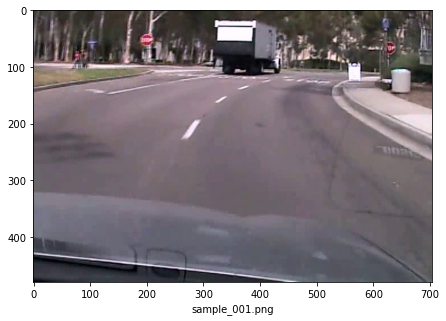

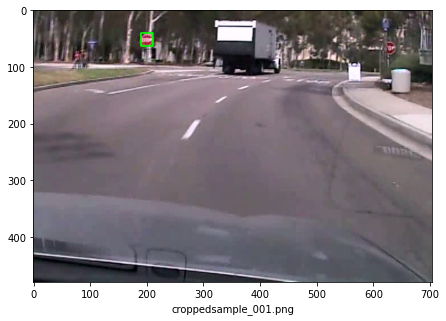

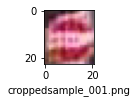

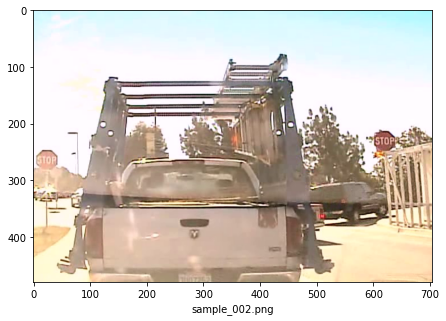

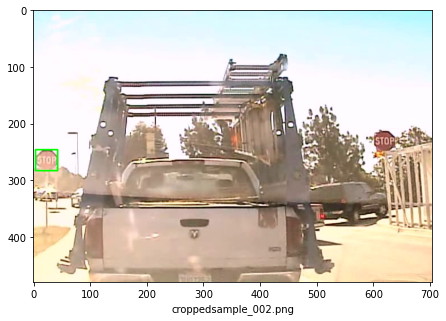

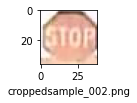

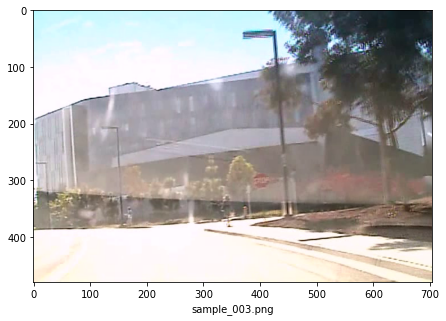

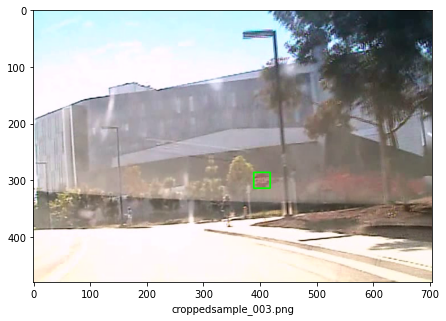

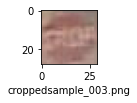

In [57]:
# Plots the passed image with the label text
def plot_image(image_path, label):
    # load the image
    image = plt.imread(image_path)

    # Draw the plot
    plt.figure(figsize=(12, 5))
    plt.xlabel(label)
    plt.imshow(image)


# Plots the cropped image wrt the values passed in
def plot_cropped_image(image_path, label, x1, y1, x2, y2):
    # load the image
    image = plt.imread(image_path)

    # Crop the image
    cropped_img = image[y1:y2, x1:x2]

    # Draw the plot
    plt.figure(figsize=(7, 1))
    plt.xlabel(label)
    plt.imshow(cropped_img)

# Plots the cropped image wrt the values passed in
def plot_boundingbox_image(image_path, label, x1, y1, x2, y2):
    # load the image
    image = plt.imread(image_path)

    # Draw the bounding box
    cv2.rectangle(
      image,
      (int(x1), int(y1)),
      (int(x2), int(y2)),
      color=(0, 255, 0),
      thickness=2
    )

    # Draw the plot
    plt.figure(figsize=(12, 5))
    plt.xlabel(label)
    plt.imshow(image)


# Plot the first few images
for i in range(3):
    plot_image(
        'db_lisa_tiny/' +
        annotations.filename[i], annotations.filename[i]
    )
    plot_boundingbox_image(
        'db_lisa_tiny/' +
        annotations.filename[i],
        'cropped' + annotations.filename[i],
        annotations.x1[i],
        annotations.y1[i],
        annotations.x2[i],
        annotations.y2[i]
    )
    plot_cropped_image(
        'db_lisa_tiny/' +
        annotations.filename[i],
        'cropped' + annotations.filename[i],
        annotations.x1[i],
        annotations.y1[i],
        annotations.x2[i],
        annotations.y2[i]
    )


### Training

### Testing